In [1]:
import pandas as pd
from upsetplot import UpSet, plot
import matplotlib.pyplot as plt


In [10]:
consensus_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/2_consensus.parquet')

In [11]:
len(consensus_df)

1850

In [12]:
passed_consensus_df = (
    consensus_df
    .dropna(subset=["diplotype_consensus"])
    .copy()
)
passed_consensus_df = passed_consensus_df.query("diplotype_consensus != 'no_call'")
potential_novel_alleles = [
    'WHB3711', 'WHB4034', 'WHB4120', 'WHB4360', 'WHB4694', 'WHB5352',
    'WHB3484', 'WHB4156', 'WHB5002', 'WHB5419', 'WHB3646', 'WHB3750',
    'WHB5450', 'WHB3827', 'WHB4038', 'WHB3823', 'WHB4039', 'WHB4775',
    'WHB5383', 'WHB4768', 'WHB4836', 'WHB3871', 'WHB3653', 'WHB3493',
    'WHB4615', 'WHB4943', 'WHB4891', 'WHB4967'
]
passed_consensus_df = passed_consensus_df[~passed_consensus_df['sample_id'].isin(potential_novel_alleles)]
len(passed_consensus_df)

1487

In [15]:
non_consensus_df = consensus_df[~consensus_df['sample_id'].isin(passed_consensus_df['sample_id'])]
len(non_consensus_df)

363

## Count consensus_diplotype is no_call 

In [3]:
list_combination_counts = consensus_df['callers_in_agreement'].apply(tuple).value_counts()
no_call = consensus_df.query("diplotype_consensus == 'no_call'")['callers_in_agreement']
no_call

935    [cyrius, stellarpgx]
Name: callers_in_agreement, dtype: object

## Count combination

In [21]:
# Count the occurrences of each unique list combination in the 'callers_in_agreement' column
# 
list_combination_counts = passed_consensus_df['callers_in_agreement'].apply(tuple).value_counts()

counts_df = list_combination_counts.reset_index()

counts_df.columns = ['list_combination', 'count']

counts_df['list_combination'] = counts_df['list_combination'].apply(list)

aldy_combination = counts_df[counts_df['list_combination'].apply(lambda x: 'aldy' in x)]['count'].sum()
stellarpgx_combination = counts_df[counts_df['list_combination'].apply(lambda x: 'stellarpgx' in x)]['count'].sum()
cyrius_combination = counts_df[counts_df['list_combination'].apply(lambda x: 'cyrius' in x)]['count'].sum()

print(counts_df)

             list_combination  count
0  [aldy, cyrius, stellarpgx]   1040
1              [aldy, cyrius]    226
2        [cyrius, stellarpgx]    125
3          [aldy, stellarpgx]     96


## Count no call

In [31]:
aldy_noCall = len(consensus_df[consensus_df['aldy'].apply(lambda x: x[0] is None)])
stellarpgx_noCall = len(consensus_df[consensus_df['stellarpgx'].apply(lambda x: x[0] is None)])
cyrius_noCall = len(consensus_df[consensus_df['cyrius'].apply(lambda x: x[0] is None)])

print(consensus_df['aldy'].apply(lambda x: x[0] is None  ).value_counts(),
consensus_df['stellarpgx'].apply(lambda x: x[0] is None ).value_counts(),
consensus_df['cyrius'].apply(lambda x: x[0] is None ).value_counts())

# False is equal to succesful calls and True is equal to failed calls

False    1849
True        1
Name: aldy, dtype: int64 False    1846
True        4
Name: stellarpgx, dtype: int64 False    1658
True      192
Name: cyrius, dtype: int64


## Count unique succesful calls

In [32]:
# 1850 - no calls - combination calls

unique_aldy = len(consensus_df) - aldy_noCall - aldy_combination
unique_cyrius = len(consensus_df) - cyrius_noCall - cyrius_combination
unique_steallarpgx = len(consensus_df) - stellarpgx_noCall - stellarpgx_combination
print(f"unique_aldy = {unique_aldy}, unique_cyrius = {unique_cyrius}, unique_steallarpgx = {unique_steallarpgx}")

unique_aldy = 487, unique_cyrius = 267, unique_steallarpgx = 585


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

<Figure size 1080x720 with 0 Axes>

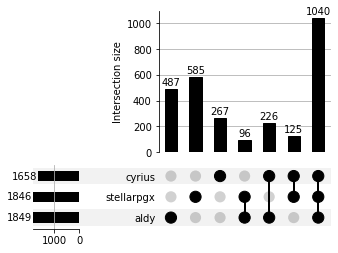

In [33]:
# New consensus (1487)
# Inputting manually, for testing purposes
plt.figure(figsize=(15, 10))

data = {
    (True, False, False): 487, #Unique aldy
    (False, True, False): 267, #Unique cyrius
    (False, False, True): 585, #Unique stellarpgx
    (True, True, False): 226, #Aldy and cyrius
    (True, False, True): 96, #Aldy and stellarpgx
    (False, True, True): 125, #Cyrius and stellarpgx
    (True, True, True): 1040, #All three
}


# Filter out the zero-value groups
filtered_data = {k: v for k, v in data.items() if v != 0}

index = pd.MultiIndex.from_tuples(filtered_data.keys(), names=['aldy', 'cyrius', 'stellarpgx'])

series_data = pd.Series(list(filtered_data.values()), index=index)

upset_plot = UpSet(series_data, show_counts=True,)
plt.rcParams["figure.figsize"] = [50, 20]

# Plot
upset_plot.plot()
# plt.show()



{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

<Figure size 1080x720 with 0 Axes>

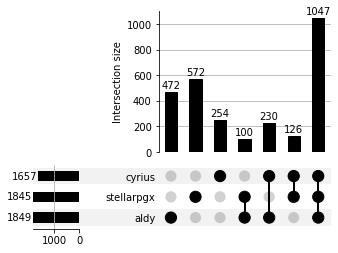

In [7]:
# Inputting manually, for testing purposes
plt.figure(figsize=(15, 10))

data = {
    (True, False, False): 472, #Unique aldy
    (False, True, False): 254, #Unique cyrius
    (False, False, True): 572, #Unique stellarpgx
    (True, True, False): 230, #Aldy and cyrius
    (True, False, True): 100, #Aldy and stellarpgx
    (False, True, True): 126, #Cyrius and stellarpgx
    (True, True, True): 1047, #All three
}


# Filter out the zero-value groups
filtered_data = {k: v for k, v in data.items() if v != 0}

index = pd.MultiIndex.from_tuples(filtered_data.keys(), names=['aldy', 'cyrius', 'stellarpgx'])

series_data = pd.Series(list(filtered_data.values()), index=index)

upset_plot = UpSet(series_data, show_counts=True,)
plt.rcParams["figure.figsize"] = [50, 20]

# Plot
upset_plot.plot()
# plt.show()



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


aldy_callRate = (len(consensus_df) - aldy_noCall) / len(consensus_df) * 100
cyrius_callRate = (len(consensus_df) - cyrius_noCall) / len(consensus_df) * 100
stellarpgx_callRate = (len(consensus_df) - stellarpgx_noCall) / len(consensus_df) * 100
# Create a DataFrame with your data
data = {
    'Tools': ['Cyrius', 'Aldy', 'StellarPGx'],
    'Call rate (%)': [cyrius_callRate, aldy_callRate, stellarpgx_callRate],
}
df = pd.DataFrame(data)




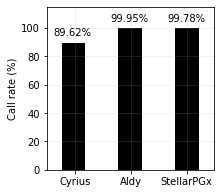

In [36]:
plt.figure(figsize=(3, 3))  # Reduced the figure size
barplot = sns.barplot(x='Tools', y='Call rate (%)', data=df, color='black', edgecolor="black", linewidth=1)

# Adjusting the width and position of the bars to balance them
for bar in barplot.patches:
    bar.set_width(bar.get_width() * 0.5)
    bar.set_x(bar.get_x() + bar.get_width() * 0.5)

barplot.patches[0].set_x(barplot.patches[0].get_x() - 0.04)
barplot.patches[1].set_x(barplot.patches[1].get_x() - 0.02)
barplot.patches[2].set_x(barplot.patches[2].get_x())

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + "%", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',)

plt.grid(alpha=0.2)
plt.xlabel(None)
plt.ylim(0, 115)
plt.show()

## Notes
16 samples have consensus but found to have potential novel alleles and therefore removed from the analysis